# single Layer perceptron:-
- we study about this topic in detail in note book we clear all the concept of this topic there
- here we simple implement this and a little bit study about libraries use in this topic

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# mlxtend :-
- mlxtend (short for Machine Learning Extensions) is a Python library that provides a set of useful tools and extensions for data science and machine learning. It is built on top of popular libraries like NumPy, SciPy, scikit-learn, matplotlib, and pandas, adding functions that simplify many common machine learning tasks.
# plot_decision_regions :-
- plot_decision_regions is a powerful visualization function from the mlxtend library that allows you to graphically inspect the decision boundaries of machine learning models. It is particularly useful for understanding how classifiers separate different classes in a dataset.

In [13]:
# here i am loading data set
data = pd.read_csv("placement1.csv")  # here we read the csv file 
data.head(3)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1


- here we plot the datav on graph through seaborn library

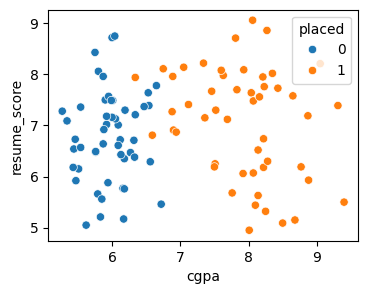

In [14]:
# to plot the data in graph 
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa" , y="resume_score",data=data,hue="placed")
plt.show()

In [15]:
# we separate data to input out 
x = data.iloc[:,:-1]   # input data
y = data["placed"]      # output data 
# split the data 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
pr = Perceptron()    # call perceptron class
pr.fit(x_train,y_train)

Perceptron()

- in the above cell the perceptron class take these parameter and the parameter take these default  values we can change them 
- *, penalty: Literal['l2', 'l1', 'elasticnet'] | None = None, alpha: Float = 0.0001, l1_ratio: Float = 0.15, fit_intercept: bool = True, max_iter: Int = 1000, tol: Float | None = 0.001, shuffle: bool = True, verbose: Int = 0, eta0: Float = 1, n_jobs: Int | None = None, random_state: Int | RandomState | None = 0, early_stopping: bool = False, validation_fraction: Float = 0.1, n_iter_no_change: Int = 5, class_weight: Mapping[str, float] | str | None = None,

In [17]:
# to check the accuracy
pr.score(x_train,y_train)*100,pr.score(x_test,y_test)*100

(73.75, 75.0)

- in the below cell the plot_desicion_regions draw a desicion line between the data 

d:\anaconda\envs\tf-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


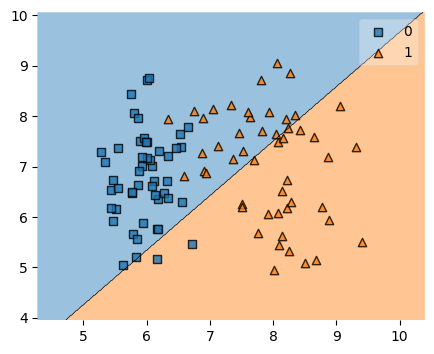

In [18]:
# in this we seee how the perceptron make a decision line 
plt.figure(figsize=(5,4))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=pr) 
plt.show()

- a single layer perceptron does not give a accurate result, that is why we use multi layer perceptron 

In [19]:
pr.coef_

array([[ 44.42, -41.1 ]])

In [20]:
pr.intercept_

array([-47.])

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [22]:
def forward(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z)


In [23]:
# 2. Cost function (Binary Cross Entropy)
def cost_function(y_true, y_pred):
    m = y_true.shape[0]
    return - (1/m) * np.sum(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

In [24]:
# 4. Gradient computation
def compute_gradient(X, y, y_pred):
    m = y.shape[0]
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

In [25]:
# 5. Update weights
def update_weights(weights, bias, dw, db, lr):
    weights -= lr * dw
    bias -= lr * db
    return weights, bias

In [26]:
# 6. Training function
def train(X, y, lr=0.1, epochs=1000):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    cost_list = []

    for i in range(epochs):
        y_pred = forward(X, weights, bias)
        cost = cost_function(y, y_pred)
        dw, db = compute_gradient(X, y, y_pred)
        weights, bias = update_weights(weights, bias, dw, db, lr)
        cost_list.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return weights, bias, cost_list

In [29]:
w,b,cost_hist = train(x_train,y_train)

Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.4757
Epoch 200, Cost: 0.4575
Epoch 300, Cost: 0.4465
Epoch 400, Cost: 0.4369
Epoch 500, Cost: 0.4280
Epoch 600, Cost: 0.4194
Epoch 700, Cost: 0.4113
Epoch 800, Cost: 0.4034
Epoch 900, Cost: 0.3959


In [47]:
pred = w[0]*x_test.iloc[0][0] + w[1]*x_test.iloc[0][1] + b
if pred>0.5:
    print(1)
else:
    print(0)

0


C:\Users\BM LAPTOP\AppData\Local\Temp\ipykernel_5480\3166437965.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = w[0]*x_test.iloc[0][0] + w[1]*x_test.iloc[0][1] + b


In [ ]:
import numpy as np

# 1. Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Cost function (Binary Cross Entropy)
def cost_function(y_true, y_pred):
    m = y_true.shape[0]
    return - (1/m) * np.sum(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# 3. Hypothesis or prediction
def forward(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z)

# 4. Gradient computation
def compute_gradient(X, y, y_pred):
    m = y.shape[0]
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

# 5. Update weights
def update_weights(weights, bias, dw, db, lr):
    weights -= lr * dw
    bias -= lr * db
    return weights, bias

# 6. Training function
def train(X, y, lr=0.1, epochs=1000):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    cost_list = []

    for i in range(epochs):
        y_pred = forward(X, weights, bias)
        cost = cost_function(y, y_pred)
        dw, db = compute_gradient(X, y, y_pred)
        weights, bias = update_weights(weights, bias, dw, db, lr)
        cost_list.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost:.4f}")

    return weights, bias, cost_list
